In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy
import scipy.stats as ss
%matplotlib inline
matplotlib.rcParams['font.size'] = 18
matplotlib.rcParams['figure.dpi'] = 75
import seaborn as sns
# from statsmodels.sandbox.stats.multicomp import multipletests

In [266]:
!pip3 install statsmodels


     |████████████████████████████████| 9.5 MB 5.0 MB/s eta 0:00:01
     |████████████████████████████████| 231 kB 11.5 MB/s eta 0:00:01


In [267]:
from statsmodels.sandbox.stats.multicomp import multipletests

# 3.A

In [ ]:
# preprocess done on the file: 
Removed all the rows that contains !. and started working on the file from line starting with Class.

Then I collected from each line the first item and set that as header for the column

In [272]:
df = pd.read_csv('AMI_GSE66360_series_matrix.csv', index_col=0, header=None).T
df

,Class,ID_REF,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
1,H,GSM1620819,5.866377893,8.22579012,6.17973231,6.179477974,2.792047952,9.290410779,6.998285145,5.348943925,...,13.257325,13.266235,14.57123,14.276568,4.504659,3.139334,2.747015,2.651554,3.413429,3.140612
2,H,GSM1620820,4.948736331,7.525865369,6.628137025,6.58288903,2.69571445,9.462275035,6.558214949,5.410884095,...,13.59386,13.517013,14.738834,14.341233,4.409226,3.039961,2.638606,2.643615,3.399063,3.132691
3,H,GSM1620821,5.148384393,7.764636529,5.859151477,6.602134766,2.580181122,9.116776316,6.851622539,5.254073031,...,13.372759,13.416583,14.627181,14.318568,4.310076,3.220109,2.495261,2.626028,3.53997,3.698396
4,H,GSM1620822,5.064418945,7.198461482,5.974135101,6.545904723,2.712123845,9.134584186,7.357827486,5.242139865,...,13.490226,13.494827,14.754124,14.363297,4.439311,3.263782,2.544199,2.504958,3.396225,3.638612
5,H,GSM1620823,5.017832878,7.831450258,6.793079158,5.911542321,2.723686912,9.582343511,7.283872601,5.219483996,...,13.236785,13.330192,14.548389,14.263677,4.562883,3.138524,2.50663,2.609707,3.43472,3.577649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,M,GSM1620913,6.472517225,8.261421952,6.367759272,6.440978114,3.73013912,7.355729877,6.206879166,6.217929861,...,6.601746,5.942308,7.290514,8.988511,5.567947,5.55878,5.429437,4.48794,4.254286,5.375811
96,M,GSM1620914,5.678815851,6.925752665,6.835755831,6.955883278,2.914867562,7.944294937,6.638364166,5.992343792,...,14.271037,14.163706,14.884506,14.792506,4.902195,3.416999,2.834741,2.782356,3.88208,3.744138
97,M,GSM1620915,5.653286378,7.918424183,7.577034915,6.499215058,3.013901455,8.563122679,7.379567509,5.766028609,...,13.898616,13.682425,14.884506,14.783801,5.239906,3.699181,3.249683,3.056727,3.649827,4.021536
98,M,GSM1620916,6.013841046,7.442701377,7.147417202,6.587065112,2.729319786,8.699221635,6.598349589,5.577456268,...,13.847006,13.551593,14.858066,14.778166,4.556134,3.48528,2.711413,2.833818,3.52341,3.812564


## 1 + 2
#### 1) How many genes profiled?
#### 2) How many samples (subjects/patients) in total?

In [25]:
print(f"Number of genes: {df.iloc[:,2:].shape[1]}, number of patients: {df.iloc[:,2:].shape[0]}")

Number of genes: 54675, number of patients: 99


#### 3) How many samples in each class?

In [26]:
df["Class"].value_counts()

H    50
M    49
Name: Class, dtype: int64

#### 4) If there are missing values, then remove the entire row (gene) from the data matrix. How many rows left now?

In [209]:
df.dropna(axis='columns',inplace=True) #Removing columns instead of rows because columns are genes.
number_of_genes = df.shape[1]
print(f"Number of genes: {number_of_genes}")

Number of genes: 54630


In [210]:
# df.to_csv("AMI_GSE66360_series_matrix_non_empty.csv", index=False)

In [211]:
cols = list(df.columns)
# cols.remove('ID_REF')

genes_cols_dtypes = {c:'float' for c in cols if c not in ['Class', 'ID_REF']}
# genes_cols_dtypes['Class'] = 'str'  

df = pd.read_csv("AMI_GSE66360_series_matrix_non_empty.csv", dtype=genes_cols_dtypes)

#### 5) Pick 20 genes at random. Draw histograms comparing. expression levels of each of these genes in the two classes M and H.

In [36]:
import random
num_to_select = 20

genes_index_random_picked = random.sample(list(range(number_of_genes)), num_to_select)

In [213]:
df_20_genes_samples = df.iloc[:, [0] + genes_index_random_picked].copy()
cols = list(df_20_genes_samples.columns)
cols.remove('Class')
# for col in cols:
#     df_20_genes_samples[col] = df_20_genes_samples[col].astype(float)
    
classes = df_20_genes_samples.iloc[:,0]
H_vector = classes == "H"
M_vector = classes == "M"
df_20_genes_samples_class_H = df_20_genes_samples[H_vector]
df_20_genes_samples_class_M = df_20_genes_samples[M_vector]


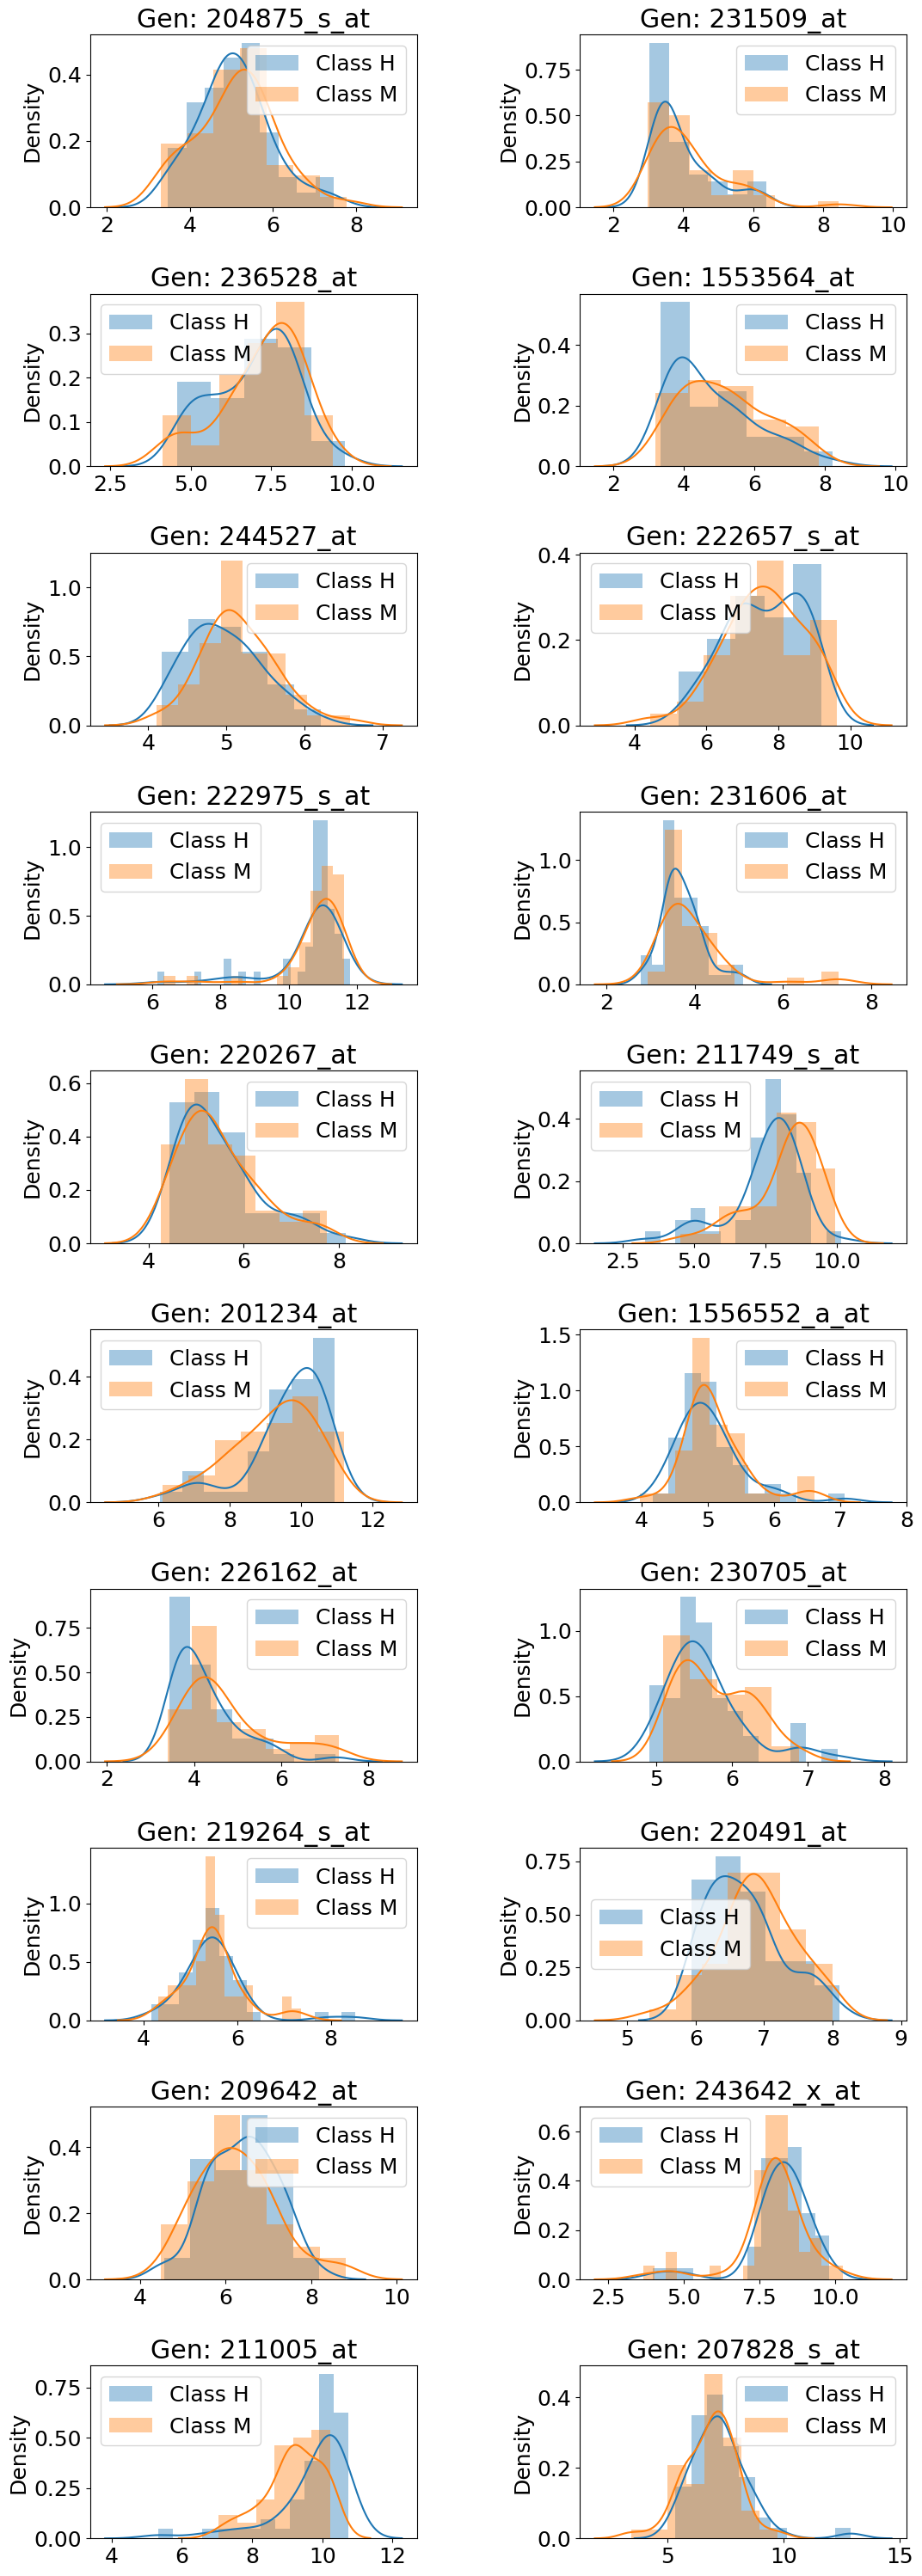

In [214]:
import warnings
warnings.filterwarnings('ignore')

import random
import numpy
from matplotlib import pyplot
import seaborn as sns
plt.rcParams['figure.figsize'] = [10, 32]
plt.rcParams['figure.dpi'] = 100

fig = plt.figure()
fig.subplots_adjust(top=0.92, bottom=0.01, left=0.0010, right=0.95, hspace=0.5, wspace=0.5)

for idx, col in enumerate(cols, start=1):
    ax = fig.add_subplot(10, 2, idx)
    h_values = df_20_genes_samples_class_H[col].to_numpy()
    m_values = df_20_genes_samples_class_M[col].to_numpy()    
    sns.distplot(h_values, ax=ax, label='Class H').set_title(f"Gen: {col}")
    sns.distplot(m_values, ax=ax, label='Class M')
    plt.legend() 


# 3.B


In [243]:
classes = df.iloc[:,0]
M_vector = classes == "M"
H_vector = classes == "H"

max_rank = 0
def calculate_RS(g):
    global max_rank
    ranks = g.rank()
    if max_rank < ranks[M_vector].sum():
        max_rank = ranks[M_vector].sum()
    return ranks[M_vector].sum()

ranked_df = df.iloc[:,2:].apply(calculate_RS, axis=0)
ranked_values = ranked_df.to_numpy()


## 1) Consider some gene, g. Under the null model (which assumes that for g there is no M vs H DE), what is the expected sum of ranks of g’s expression levels measured for samples labeled M?

In [244]:
np.mean(ranked_values)

2461.560664860511

## 2) Denote this sum of ranks by RS(g). What is the maximal value, c, that RS(g) can take?

In [249]:
print(f"If all M class are ordered together at the top, than the sum of 49 (number of samples with class M) rankes from 51 to 99 is: {sum(i for i in range(51, 100))}, the real value is: {max_rank}")

If all M class are ordered together at the top, than the sum of 49 (number of samples with class M) rankes from 51 to 99 is: 3675, the real value is: 3549.0


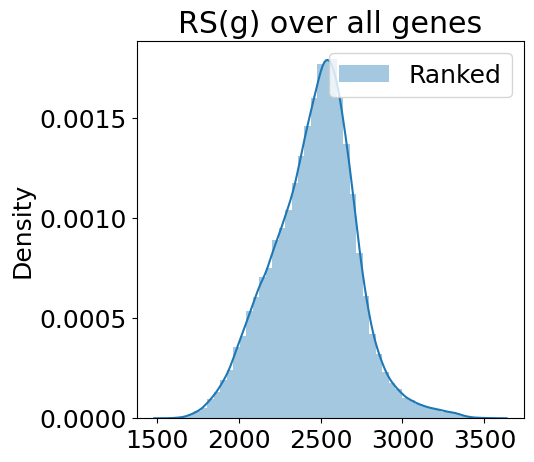

In [250]:
plt.rcParams['figure.figsize'] = [5, 5]
plt.rcParams['figure.dpi'] = 100

classes = df.iloc[:,0]
M_vector = classes == "M"
H_vector = classes == "H"

fig = plt.figure() 
sns.distplot(ranked_values, label='Ranked').set_title("RS(g) over all genes")
plt.legend() 

## Part c

In [251]:
alpha = 0.07*2 #Since ss.ranksums is a two-sided test, we need to multiply alpha by 2 

def WRS_test(g):
    return ss.ranksums(g[M_vector],g[H_vector])

WRS_df = df.iloc[:,2:].apply(WRS_test, axis=0,result_type="expand")

In [252]:
WRS_test_overexpressed_df = WRS_df.T[(WRS_df.T.iloc[:,0] > 0) & (WRS_df.T.iloc[:,1] < alpha)]
WRS_test_underexpressed_df = WRS_df.T[(WRS_df.T.iloc[:,0] <= 0) & (WRS_df.T.iloc[:,1] < alpha)]
print("WRS Overexpressed Genes compared to H :",WRS_test_overexpressed_df.shape[0])
print("WRS Underexpressed Genes compared to H :",WRS_test_underexpressed_df.shape[0])

WRS Overexpressed Genes compared to H : 10787
WRS Underexpressed Genes compared to H : 10667


In [253]:
def t_test(g):
    return ss.ttest_ind(g[M_vector].astype("float"), g[H_vector].astype("float"), equal_var = False)

t_test_df = df.iloc[:,2:].apply(t_test, axis=0,result_type="expand")

In [254]:
t_test_overexpressed_df = t_test_df.T[(t_test_df.T.iloc[:,0] > 0) & (t_test_df.T.iloc[:,1] < alpha)]
t_test_underexpressed_df = t_test_df.T[(t_test_df.T.iloc[:,0] <= 0) & (t_test_df.T.iloc[:,1] < alpha)]
print("t Test Overexpressed Genes compared to H :",t_test_overexpressed_df.shape[0])
print("t Test Underexpressed Genes compared to H :",t_test_underexpressed_df.shape[0])

t Test Overexpressed Genes compared to H : 8489
t Test Underexpressed Genes compared to H : 8634


## Part d

In [255]:
under_significant_df = WRS_test_underexpressed_df.sort_values(by=WRS_test_underexpressed_df.columns[1]).head(80)
over_significant_df = WRS_test_overexpressed_df.sort_values(by=WRS_test_overexpressed_df.columns[1]).head(80)
D = over_significant_df.append(under_significant_df)
D_df = df[D.index].astype("float")
D_df_corr = D_df.corr(method="spearman")

In [256]:
def calculate_pvalues(df):
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = ss.spearmanr(df[r], df[c])[1]
    return pvalues

D_df_corr_pvalues = calculate_pvalues(D_df)

In [257]:
alpha = 0.07
significant_pvalues = D_df_corr_pvalues[D_df_corr_pvalues < alpha].count()
total_pairs = scipy.special.comb(D.shape[0],D.shape[1])
significant_pairs = (np.sum(significant_pvalues) - 160)/2
print("Total pairs : {}".format(int(total_pairs)))
print("Significant co-expressed gene pairs : {}".format(int(significant_pairs)))
print("{}% of pairs are Significant".format(round(significant_pairs/total_pairs,2)*100))

Total pairs : 12720
Significant co-expressed gene pairs : 12431
98.0% of pairs are Significant


### Only "M" labeled

In [258]:
D_M_df = D_df[M_vector]
D_M_df_corr = D_M_df.corr(method="spearman")
D_M_df_corr_pvalues = calculate_pvalues(D_M_df)

In [259]:
significant_pvalues = D_M_df_corr_pvalues[D_M_df_corr_pvalues < alpha].count()
significant_pairs = (np.sum(significant_pvalues) - 120)/2
print("Total pairs : {}".format(int(total_pairs)))
print("Significant co-expressed gene pairs : {}".format(int(significant_pairs)))
print("{}% of pairs are Significant".format(round(significant_pairs/total_pairs,2)*100))

Total pairs : 12720
Significant co-expressed gene pairs : 6109
48.0% of pairs are Significant


## Part e

In [260]:
def overabundance(statistic_df, test_type):
    number_of_genes = df.shape[1]
    overabundance_df = statistic_df.copy()
    overabundance_df["statistic"] = overabundance_df["statistic"].abs()
    overabundance_df["expected distribution"] = overabundance_df["p_value"]*number_of_genes
    overabundance_df["actual distribution"] = overabundance_df["statistic"].rank(ascending = False)   
    ax = overabundance_df[["expected distribution", "actual distribution", "p_value"]]
    ax = ax.sort_values(by="p_value").plot(x="p_value")
    ax.set_xscale("log")
    ax.set_title(test_type)
    plt.ylabel("Number of genes")
    plt.show()

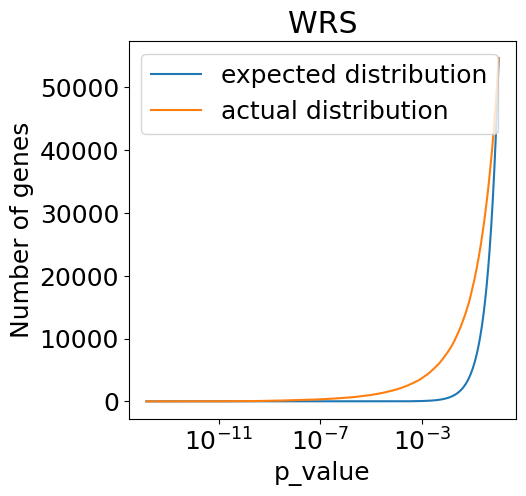

In [261]:
WRS_df.index=["statistic", "p_value"]
overabundance(WRS_df.T, "WRS")

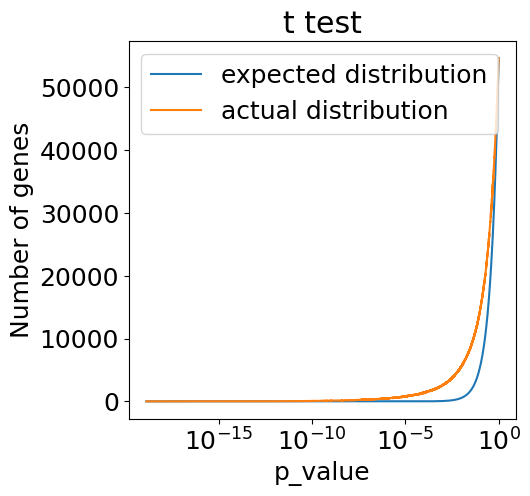

In [262]:
t_test_df.index=["statistic", "p_value"]
overabundance(t_test_df.T, "t test")

In [268]:
def calc_fdr(pvals,test_type):
    for FDR in [0.05, 0.01, 0.005]:
        reject, pvals_corrected, _, _ = multipletests(pvals, alpha=FDR, method='fdr_bh')
        number_of_genes_under_threshold = np.count_nonzero(reject)
        print("Test Type : {}, FDR: {}, Number of genes: {}".format(test_type, FDR, number_of_genes_under_threshold))

In [269]:
calc_fdr(WRS_df.loc["p_value"],"WRS")
calc_fdr(t_test_df.loc["p_value"],"t test")

Test Type : WRS, FDR: 0.05, Number of genes: 6678
Test Type : WRS, FDR: 0.01, Number of genes: 3170
Test Type : WRS, FDR: 0.005, Number of genes: 2377
Test Type : t test, FDR: 0.05, Number of genes: 3905
Test Type : t test, FDR: 0.01, Number of genes: 1948
Test Type : t test, FDR: 0.005, Number of genes: 1545


In [270]:
D_three = D.sample(n=3)
D_three = df[D_three.index]
D_three.head()

,223597_at,217202_s_at,211597_s_at
0,4.519310,6.781219,11.477246
1,5.792829,6.837768,11.118540
2,5.280644,6.396831,11.308399
3,6.294622,6.400286,11.012151
4,4.668637,6.709851,10.741166


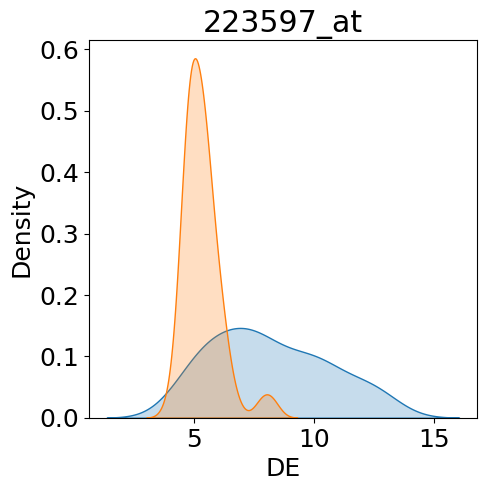

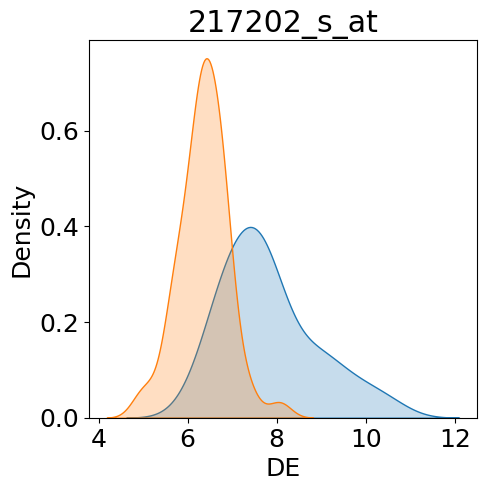

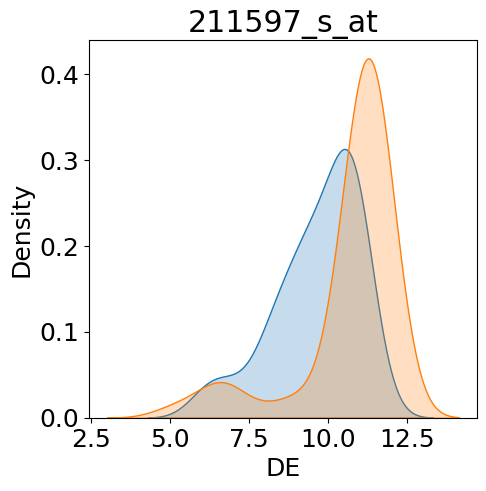

223597_at      None
217202_s_at    None
211597_s_at    None
dtype: object

In [271]:
def plot_exp_pattern(g):
    sns.kdeplot(g[M_vector], shade=True, label="M")
    sns.kdeplot(g[H_vector], shade=True, label="H")
    plt.title(g.name)
    plt.xlabel("DE")
    plt.ylabel("Density")
    plt.show()
    
D_three.apply(plot_exp_pattern, axis=0)

In [22]:

exp_values = list(range(2,15))
exp_df = pd.DataFrame(np.zeros((len(D_df.T.index), len(exp_values))),columns=exp_values,index=D_df.T.index)
for index, row in D_df.T.iterrows():
    for value in row:
        exp_df.loc[index,int(value)] += 1
exp_df.index.name = "Gene"
        

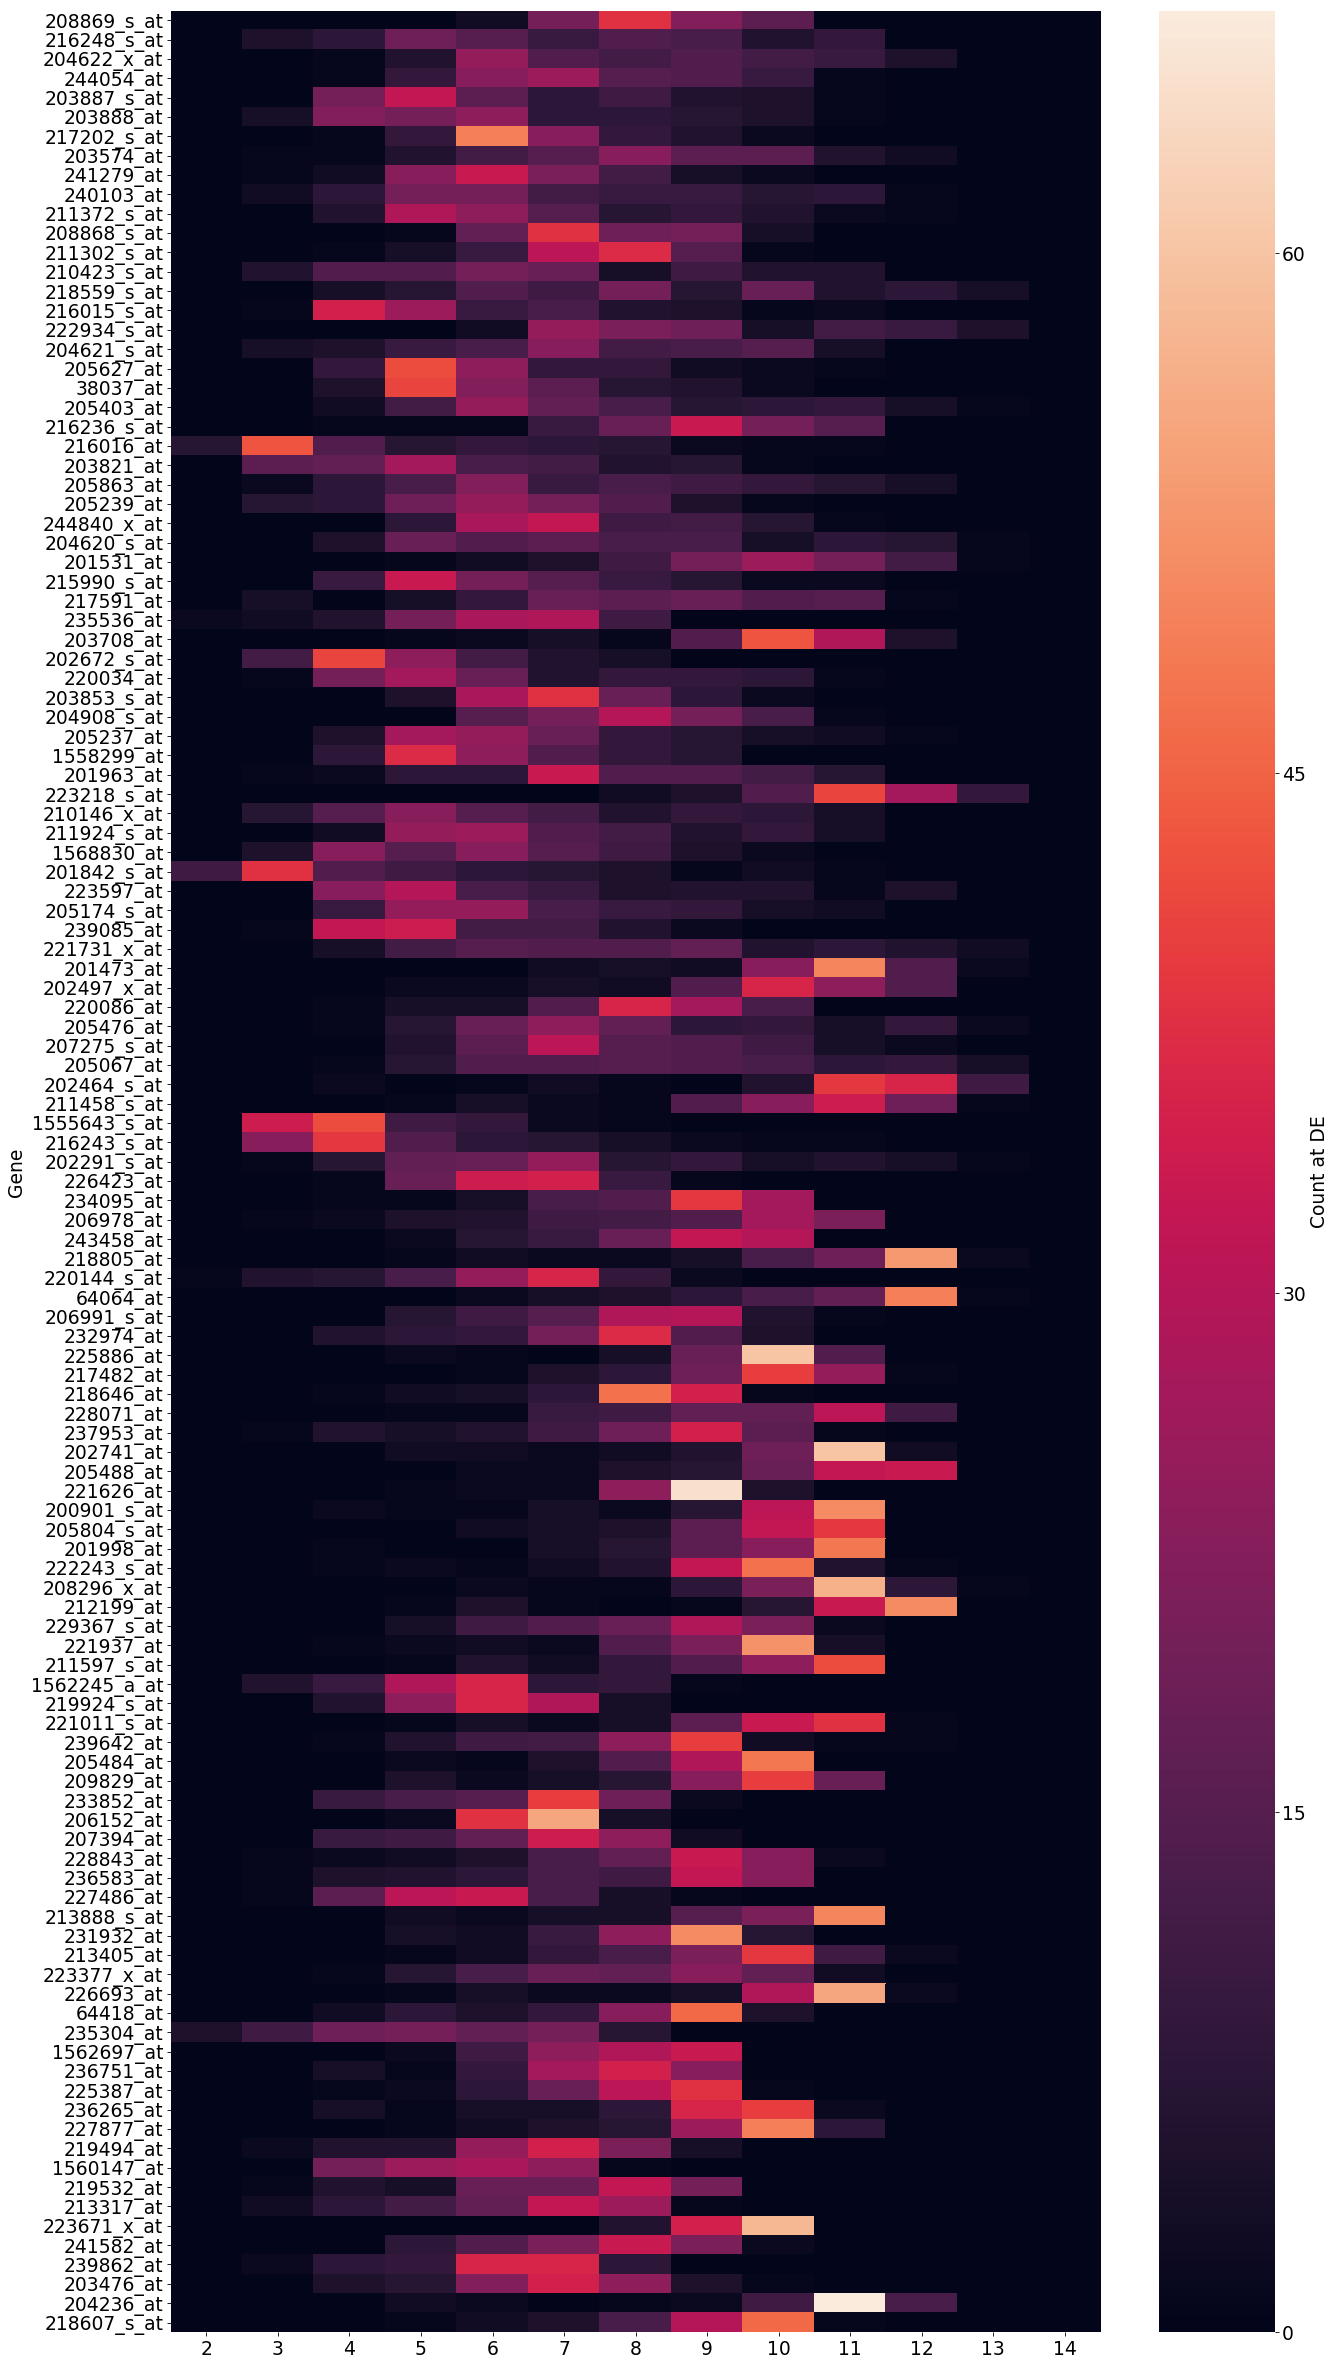

In [76]:
plt.figure(figsize = (20,41))
sns.heatmap(exp_df,cbar_kws={'label': 'Count at DE'})